# Model

\begin{align*}
H & =\Delta_{{\rm M}}b^{\dagger}b+\Omega\left(S_{x}^{A}-S_{x}^{B}\right)+\delta\left(S_{z}^{A}-S_{z}^{B}\right)+g\left(\left(S_{A}^{+}+S_{B}^{+}\right)b+\text{h.c.}\right),\\
\mathcal{L}_{\rho} & =\frac{\kappa}{2}\left(2a\rho a^{\dagger}-\left\{ a^{\dagger}a,\rho\right\} \right).
\end{align*}

# Dynamics

In [1155]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin
label_size = 20
from numpy import sqrt
import time
from numba import jit
from numpy import sin, cos

T0=time.time()
from numpy import conjugate as conj
from numpy import zeros
from numpy import exp
import scipy
from numpy import diff
from numpy.random import randint
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt
from numpy import sqrt
import time
from numba import jit
from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import scipy.special
import time 
import itertools
from itertools import permutations
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin
import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers
from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real

import time

t0=time.time()
#Parameters

##Number of atoms

N_atom=100

##Basic parameters


gC=1


DeltaM= 0*gC*sqrt(N_atom)

delta = 0 *gC


# Decay

kappa=15* gC * sqrt(N_atom)

traj=200

Omega_c = (N_atom*  gC**2)/sqrt(DeltaM**2+(kappa**2)/4)
OmegaX  = 0.1*Omega_c




##### Initial thermal state
nth=6







"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

sigma_nth=np.sqrt(nth/2  + 1/4)

#pip install sdeint


#--------------------------------------

State_List=[]




def fAB_SDE(y,t):

    sAx,sAy,sAz,sBx,sBy,sBz,bRe,bIm=y
        
    dbRedt =  DeltaM*bIm - gC*(sAy+sBy) - (kappa/2)*bRe      
    dbImdt = -DeltaM*bRe - gC*(sAx+sBx) - (kappa/2)*bIm
    
    dsAxdt =  2*gC*bIm*sAz-delta*sAy 
    dsAydt = -2*gC*bRe*sAz+delta*sAx - OmegaX*sAz
    dsAzdt =  2*gC*(bRe*sAy-bIm*sAx) + OmegaX*sAy
    
    dsBxdt =  2*gC*bIm*sBz+delta*sBy
    dsBydt = -2*gC*bRe*sBz-delta*sBx + OmegaX*sBz
    dsBzdt =  2*gC*(bRe*sBy-bIm*sBx) - OmegaX*sBy
    
    return array([dsAxdt,dsAydt,dsAzdt,dsBxdt,dsBydt,dsBzdt,dbRedt,dbImdt])


In [1156]:

def G_fAB(y,t,bn=None):
    
    B_noise=np.zeros((8,8))
    
        
    B_noise[6,6]=sqrt(kappa/4)
    B_noise[7,7]=sqrt(kappa/4)
        
    return B_noise
    

In [1157]:
import sdeint

from sdeint import itoint, stratKP2iS

In [1158]:

def Random_Uniform_Col(Nef=int(N_atom/2)):
    
    return sum(randint(2, size=Nef)-0.5)

from numpy.random import normal 



Half_N=N_atom/2



def Init_cond(Nef=int(N_atom/2)):
    
    v0 = Random_Uniform_Col()
    v1 = Random_Uniform_Col()
    v2 = Half_N
    v3 = Random_Uniform_Col()
    v4 = Random_Uniform_Col()
    v5 =-Half_N
    v6 = normal(0, sigma_nth)
    v7 = normal(0, sigma_nth)
    
    
    return [v0,v1,v2,v3,v4,v5,v6,v7]

In [1159]:


from scipy.integrate import solve_ivp

#sol = solve_ivp(fAB, [t_alt[0],t_alt[-1]],  Init_cond(), args=( None),dense_output=True)


In [1160]:
T1=10

t = np.linspace(0, T1, 12000)

In [1161]:

def TrajectorySDE():
    
    return itoint(fAB_SDE,G_fAB, Init_cond(), t)

In [1162]:

from scipy.integrate import solve_ivp

#sol = solve_ivp(fAB, [t_alt[0],t_alt[-1]],  Init_cond(), args=( None),dense_output=True)



In [1163]:
traj

200

In [1164]:



Average=TrajectorySDE()
count=1


print(count)
for j in range(traj-1):
    count=count+1
    
    Average=Average+TrajectorySDE()
    print(count)
    
    
Aver_tot=Average/count



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [1165]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [1166]:

fOmega=OmegaX/Omega_c 



In [1167]:
fOmega

0.1

Text(0, 0.5, '$\\left< \\hat{S}_x^A \\right>$')

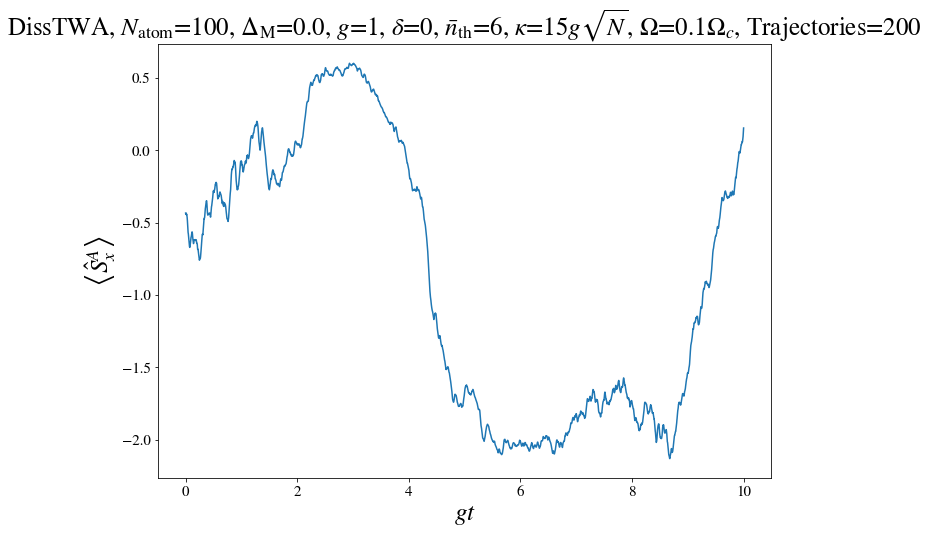

In [1168]:
plt.plot(t,Aver_tot[:,0])

plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)

plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_x^A \\right>$",fontsize=25)


Text(0, 0.5, '$\\left< \\hat{S}_y^A \\right>$')

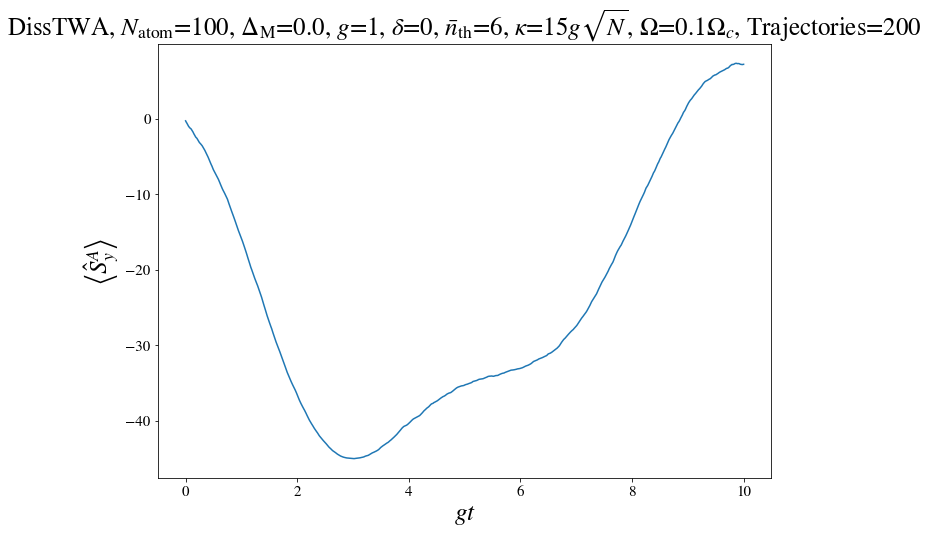

In [1169]:
plt.plot(t,Aver_tot[:,1])


plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)

plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_y^A \\right>$",fontsize=25)

Text(0, 0.5, '$\\left< \\hat{S}_z^A \\right>$')

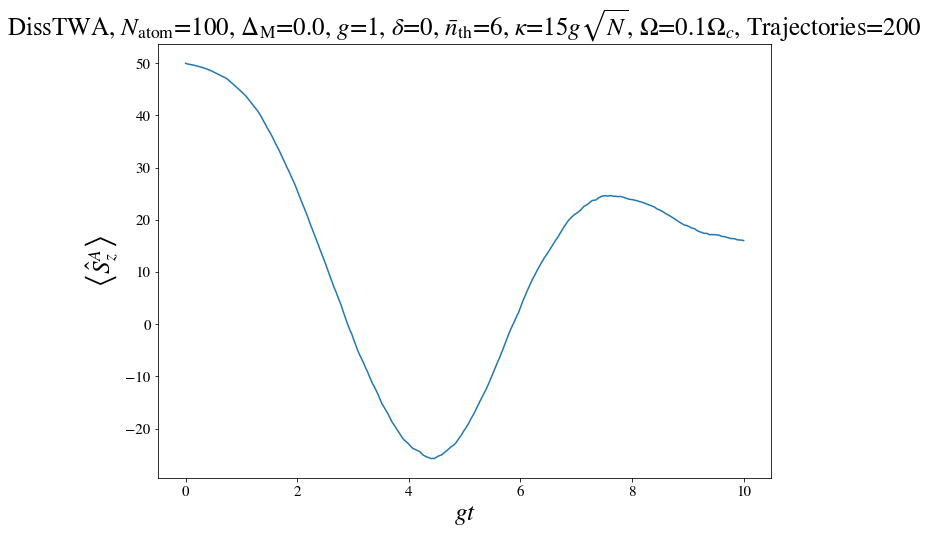

In [1170]:
plt.plot(t,Aver_tot[:,2])

plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_z^A \\right>$",fontsize=25)

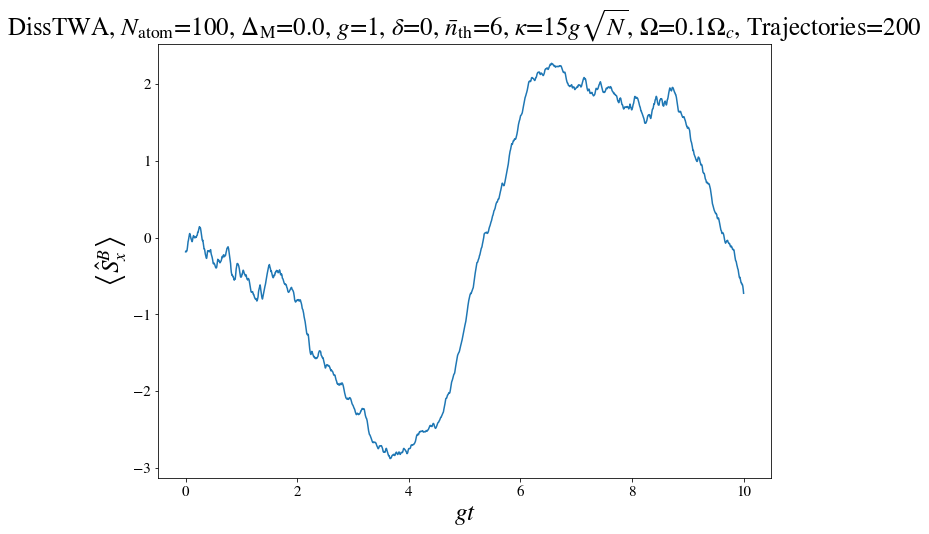

In [1171]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_x^B \\right>$",fontsize=25)

plt.plot(t,Aver_tot[:,3])

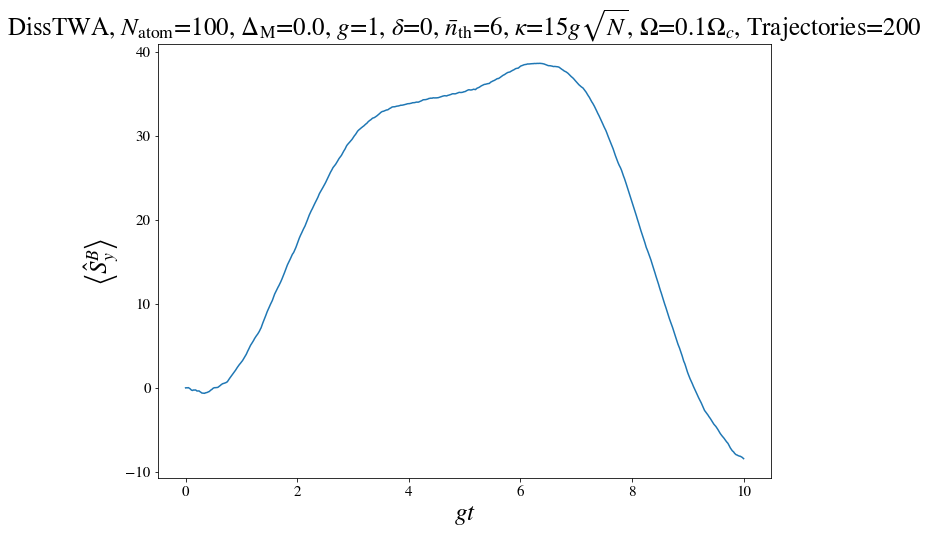

In [1172]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)

plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_y^B \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,4])

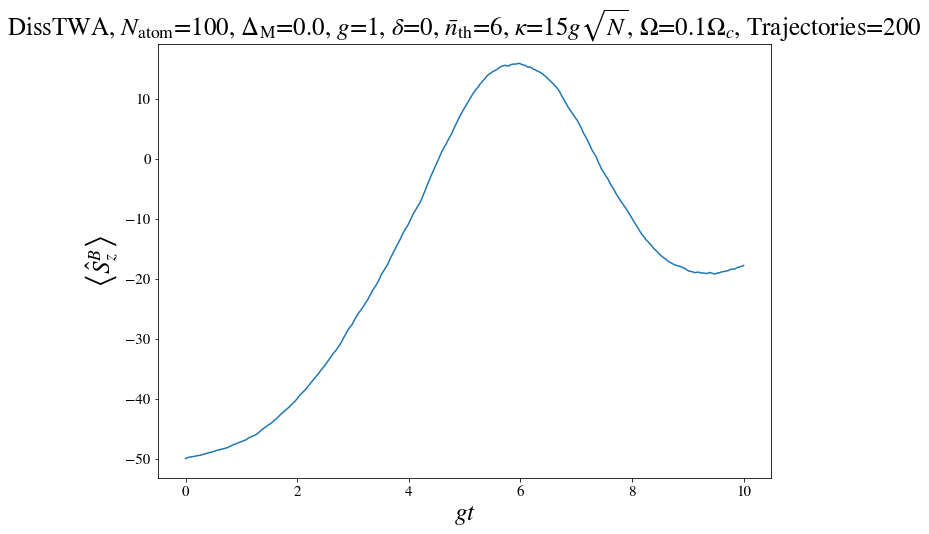

In [1173]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)

plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{S}_z^B \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,5])

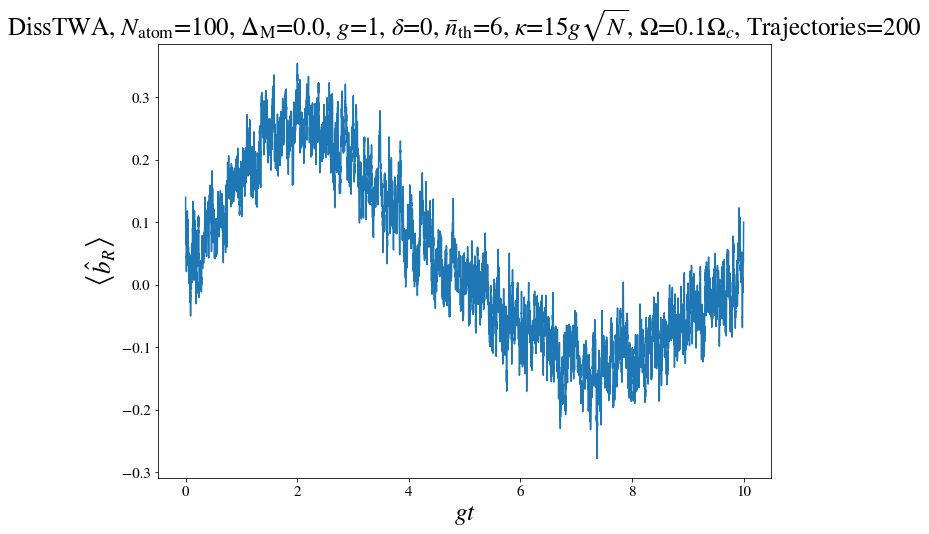

In [1174]:

plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{b}_R \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,6])

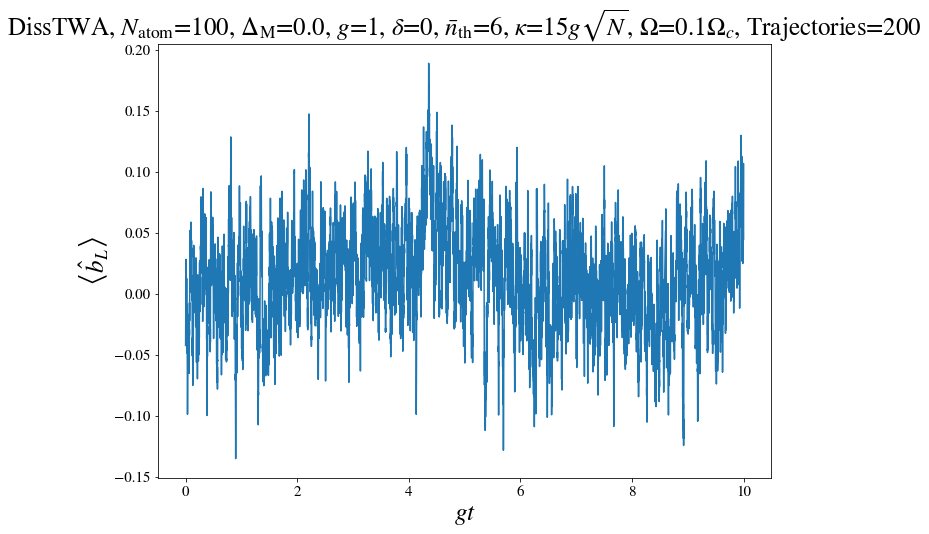

In [1175]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)



plt.xlabel("$gt $",fontsize=25)
plt.ylabel("$\\left< \\hat{b}_L \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,7])

In [1176]:
#fact_bs=gC/(DeltaM)

In [1177]:
from scipy.signal import savgol_filter

In [1178]:
SxTot=Aver_tot[:,0]+Aver_tot[:,3]
SyTot=Aver_tot[:,1]+Aver_tot[:,4]


In [1179]:
fac_trans= gC/(DeltaM**2+kappa**2 /4)

In [1180]:
fac_trans

0.00017777777777777779

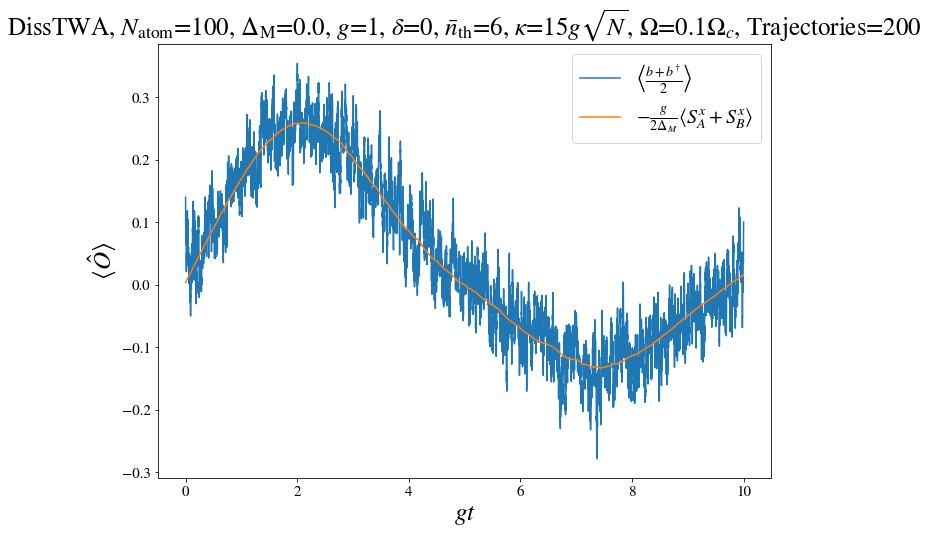

In [1181]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$g t$",fontsize=25)
plt.ylabel("$\\left< \\hat{O} \\right>$",fontsize=25)

plt.plot(t,Aver_tot[:,6],label="$\\left<  \\frac{b+b^{\\dagger}}{2} \\right>$")
plt.plot(t,-fac_trans*((kappa/2)*SyTot+DeltaM*SxTot),label="$-\\frac{g}{2\\Delta_M}\\left<S_A^x+S_B^x \\right>$")



plt.legend(fontsize=20)

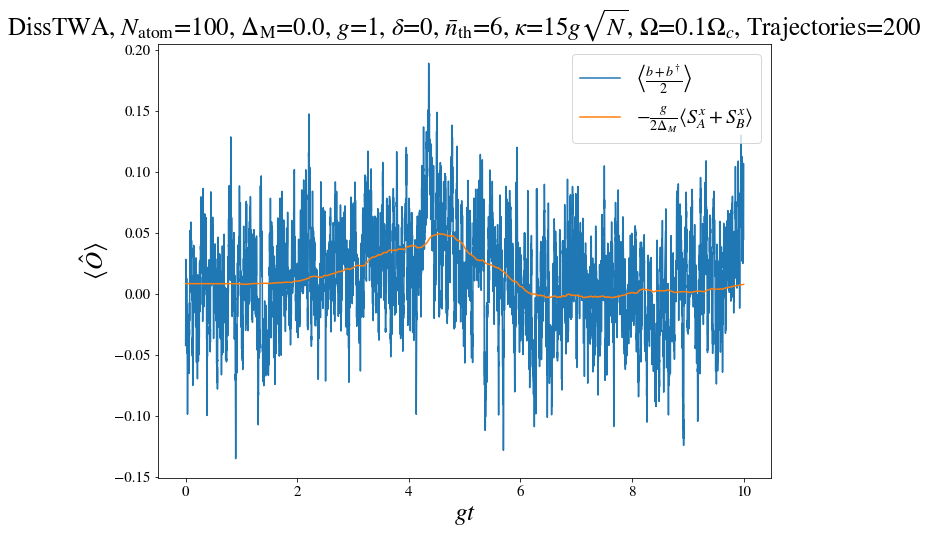

In [1182]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$g t $",fontsize=25)
plt.ylabel("$\\left< \\hat{O} \\right>$",fontsize=25)

plt.plot(t,Aver_tot[:,7],label="$\\left<  \\frac{b+b^{\\dagger}}{2} \\right>$")
plt.plot(t,fac_trans*(-(kappa/2)*SxTot+DeltaM*SyTot),label="$-\\frac{g}{2\\Delta_M}\\left<S_A^x+S_B^x \\right>$")



plt.legend(fontsize=20)

# Adiabatic-Elimination

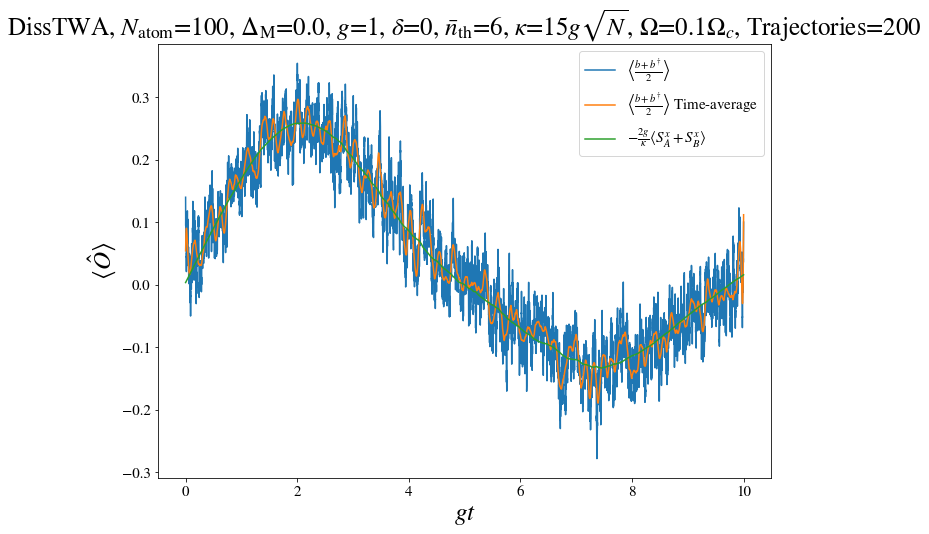

In [1183]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)


plt.xlabel("$g t $",fontsize=25)
plt.ylabel("$\\left< \\hat{O} \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,6],label="$\\left<  \\frac{b+b^{\\dagger}}{2} \\right>$")
plt.plot(t,savgol_filter(Aver_tot[:,6], 373, 7),label="$\\left<  \\frac{b+b^{\\dagger}}{2} \\right>$ Time-average")
plt.plot(t,fac_kappa*SyTot,label="$-\\frac{2g}{\\kappa}\\left<S_A^x+S_B^x \\right>$")


plt.legend()


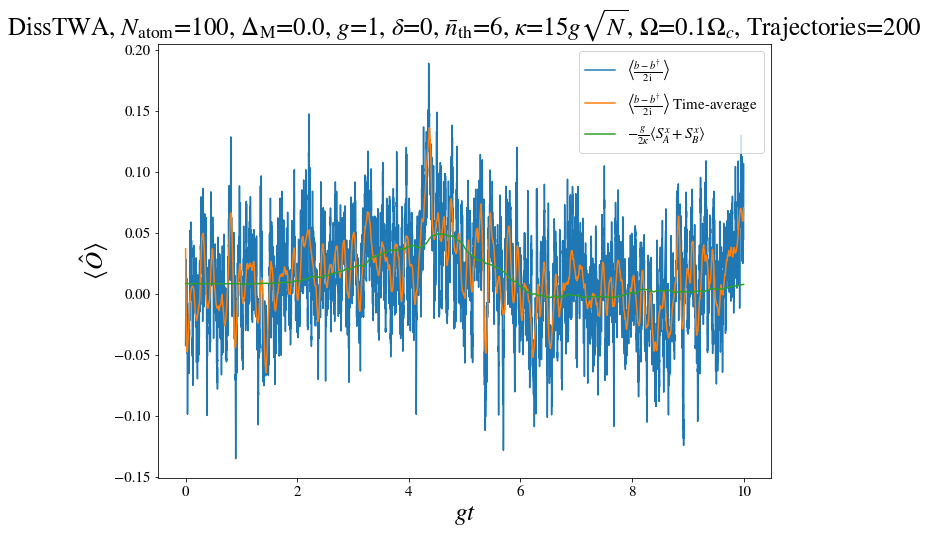

In [1184]:
plt.title("$\\rm{DissTWA}$, $N_{\\rm{atom}}$="+str(N_atom)+", $ \\Delta_{\\rm{M}}$="+str(DeltaM)+", $ g$="+str(gC)+", $ \\delta$="+str(delta)+", $\\bar{n}_{\\rm{th}}$="+str(nth)+", $\\kappa$="+str(int(kappa/(gC*sqrt(N_atom))))+"$g\\sqrt{N}$"+", $\Omega$="+str(fOmega)+"$\Omega_c$, Trajectories="+str(traj),fontsize=25)



plt.xlabel("$g t $",fontsize=25)
plt.ylabel("$\\left< \\hat{O} \\right>$",fontsize=25)


plt.plot(t,Aver_tot[:,7],label="$\\left<  \\frac{b-b^{\\dagger}}{2\\rm{i}} \\right>$")
plt.plot(t,savgol_filter(Aver_tot[:,7], 363, 7),label="$\\left<  \\frac{b - b^{\\dagger}}{2\\rm{i}} \\right>$ Time-average")
plt.plot(t,fac_kappa*SxTot,label="$-\\frac{g}{2\\kappa}\\left<S_A^x+S_B^x \\right>$")


plt.legend()
